In [1]:
from pororo import Pororo
import json

In [2]:
se = Pororo(task="sentence_embedding", lang="ko")

In [3]:
# define file path
train_file = '../../data/step1_train.json' 
validation_file = '../../data/step1_valid.json'
model_name_or_path = '../../data/models/electra'

In [4]:
with open(train_file, 'r', encoding = 'UTF-8') as fp:
    train_data = json.load(fp)

In [5]:
# create list of category, T/F label, news contents
label_lst= []
cat_lst = []
cont_lst = []
for i in range(len(train_data['input_data'])):
    label_lst.append(train_data['input_data'][i]['label'])
    cat_lst.append(train_data['input_data'][i]['category'])
    cont_lst.append(train_data['input_data'][i]['content']) 

In [6]:
# produce word vectors using sent2vec model
cont_proc_lst = []
for i in cont_lst:
    cont_proc_lst.append(se(i))

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
import numpy as np

In [8]:
# create dataframe for visualisation
df_vis = pd.DataFrame()
le = preprocessing.LabelEncoder()
df_vis['label'] = le.fit_transform(label_lst)
df_vis['cat'] = le.fit_transform(cat_lst)

In [9]:
# show label values
keys = le.classes_
values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
dictionary

{'IT/과학': 0,
 '경제': 1,
 '대북정책 폄훼': 2,
 '대중의 관심 유도': 3,
 '로열패밀리 신변이상': 4,
 '사설': 5,
 '사회': 6,
 '생활/문화': 7,
 '정치': 8,
 '최고지도자 신변이상': 9,
 '최고지도자 측근(당·정·군 관료) 숙청': 10}

In [10]:
# dimensionality reduction using PCA 
pca = PCA(n_components=3)
pca_result = pca.fit_transform(cont_proc_lst)
df_vis['pca-one'] = pca_result[:,0]
df_vis['pca-two'] = pca_result[:,1] 
df_vis['pca-three'] = pca_result[:,2]

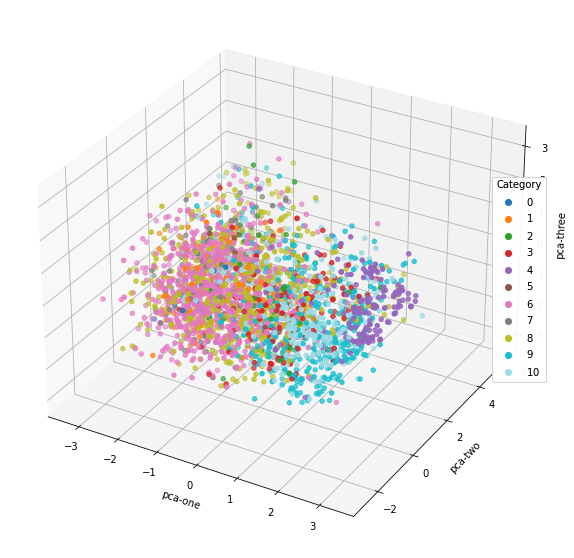

In [28]:
# visualisation using PCA 
fig = plt.figure(figsize=(16,10))
ax = plt.axes(projection='3d')
scatter = ax.scatter(
    xs=df_vis["pca-one"], 
    ys=df_vis["pca-two"], 
    zs=df_vis["pca-three"], 
    c=df_vis["cat"], 
    cmap='tab20'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="center right", title="Category")
ax.add_artist(legend1)

In [12]:
# diemsnionality reduction using t-SNE
tsne = TSNE(n_components=3,perplexity=40)
tsne_results = tsne.fit_transform(cont_proc_lst)

In [13]:
df_vis['tsne-one'] = tsne_results[:,0]
df_vis['tsne-two'] = tsne_results[:,1]
df_vis['tsne-three'] = tsne_results[:,2]

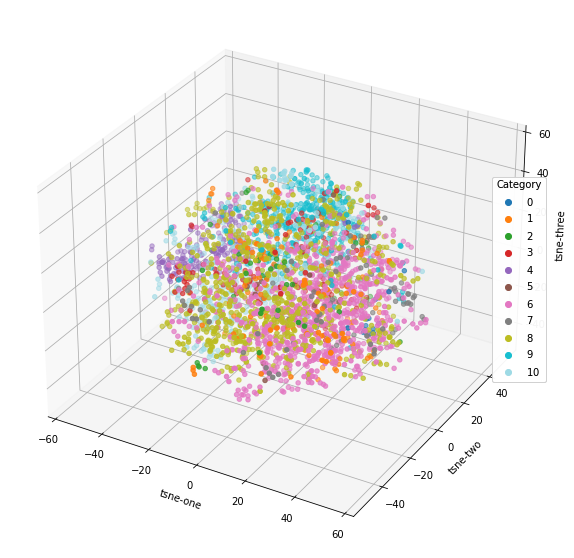

In [27]:
# visualisation using t-SNE
fig = plt.figure(figsize=(16,10))
ax = plt.axes(projection='3d')
scatter = ax.scatter(
    xs=df_vis["tsne-one"], 
    ys=df_vis["tsne-two"], 
    zs=df_vis["tsne-three"], 
    c=df_vis["cat"], 
    cmap='tab20'
)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="center right", title="Category")
ax.add_artist(legend1)

In [15]:
# first reduce dimension using pca and forward the results to t-SNE
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(cont_proc_lst)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))
tsne = TSNE(n_components=3, perplexity=40)
tsne_pca_results = tsne.fit_transform(pca_result_50)
df_vis['tsne-pca50-one'] = tsne_pca_results[:,0]
df_vis['tsne-pca50-two'] = tsne_pca_results[:,1]
df_vis['tsne-pca50-three'] = tsne_pca_results[:,2]

Cumulative explained variation for 50 principal components: 0.7878970875645338


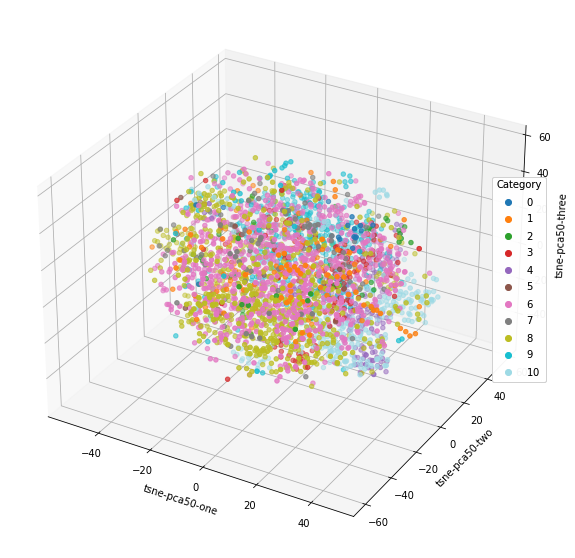

In [26]:
# visualisation using pca50 and t-SNE
fig = plt.figure(figsize=(16,10))
ax = plt.axes(projection='3d')
scatter = ax.scatter(
    xs=df_vis["tsne-pca50-one"], 
    ys=df_vis["tsne-pca50-two"], 
    zs=df_vis["tsne-pca50-three"], 
    c=df_vis["cat"], 
    cmap='tab20'
)
ax.set_xlabel('tsne-pca50-one')
ax.set_ylabel('tsne-pca50-two')
ax.set_zlabel('tsne-pca50-three')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="center right", title="Category")
ax.add_artist(legend1)


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

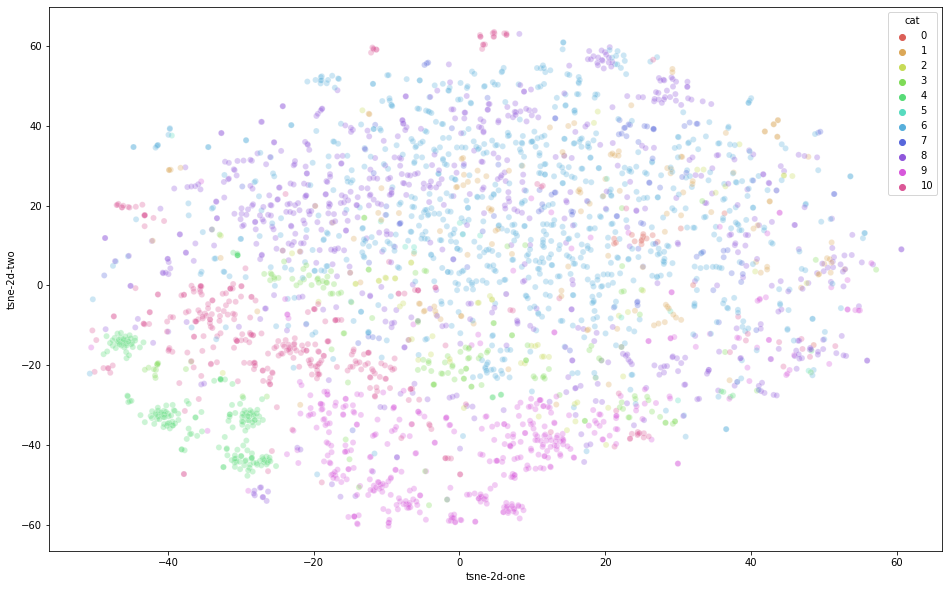

In [17]:
# 2D visualisation using t-SNE (category)
tsne = TSNE(n_components=2,perplexity=40)
tsne_results = tsne.fit_transform(cont_proc_lst)
df_vis['tsne-2d-one'] = tsne_results[:,0]
df_vis['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cat",
    palette=sns.color_palette("hls", 11),
    data=df_vis,
    legend="full",
    alpha=0.3
)

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

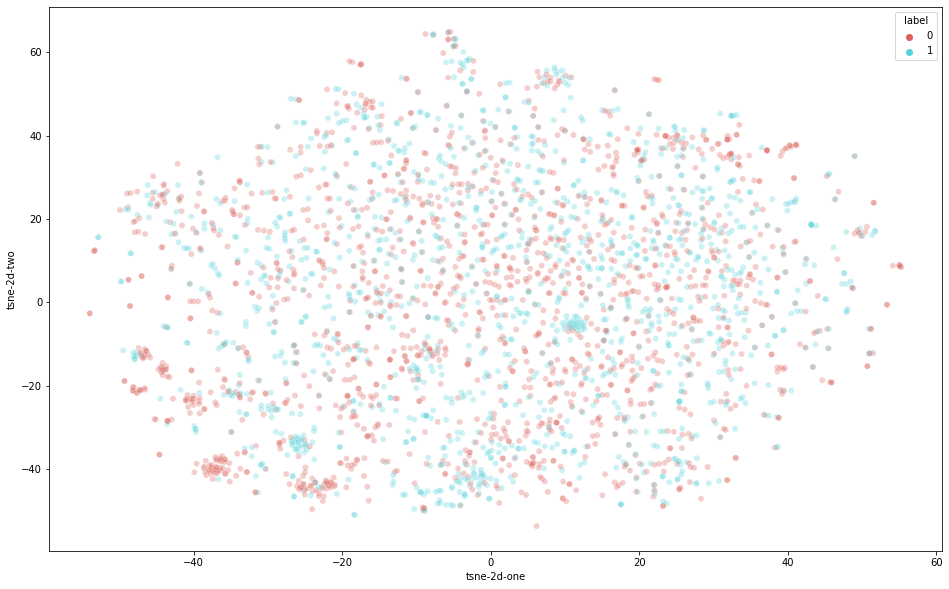

In [18]:
# 2D visualisation using t-SNE (True/False)
tsne = TSNE(n_components=2,perplexity=40)
tsne_results = tsne.fit_transform(cont_proc_lst)
df_vis['tsne-2d-one'] = tsne_results[:,0]
df_vis['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 2),
    data=df_vis,
    legend="full",
    alpha=0.3
)

In [19]:
# dimensionlaity reduction using UMAP
import umap
reducer = umap.UMAP(n_neighbors=15)
umap_results= reducer.fit_transform(cont_proc_lst)
df_vis['umap-one'] = umap_results[:,0]
df_vis['umap-two'] = umap_results[:,1]

In [20]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(cont_proc_lst)
reducer3d = umap.UMAP(n_components = 3, n_neighbors=15)
umap_results3d= reducer3d.fit_transform(pca_result_50)
df_vis['umap-one3d'] = umap_results3d[:,0]
df_vis['umap-two3d'] = umap_results3d[:,1]
df_vis['umap-three3d'] = umap_results3d[:,2]

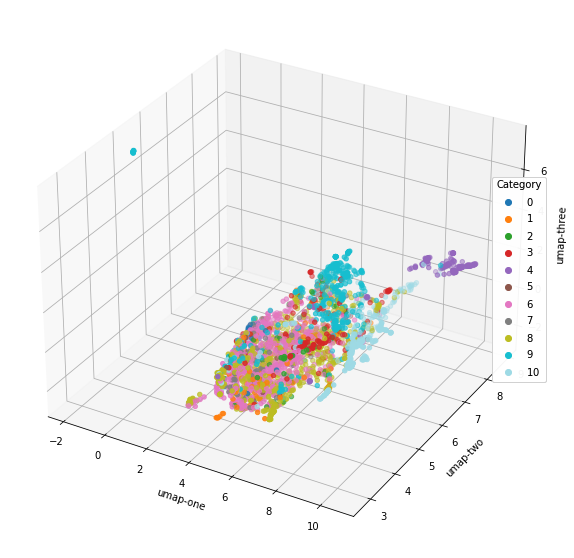

In [25]:
# visualisation using UMAP
fig = plt.figure(figsize=(16,10))
ax = plt.axes(projection='3d')

scatter = ax.scatter(
    xs=df_vis["umap-one3d"], 
    ys=df_vis["umap-two3d"], 
    zs=df_vis["umap-three3d"], 
    c=df_vis["cat"], 
    cmap='tab20'
)
ax.set_xlabel('umap-one')
ax.set_ylabel('umap-two')
ax.set_zlabel('umap-three')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="center right", title="Category")
ax.add_artist(legend1)

<AxesSubplot:xlabel='umap-one', ylabel='umap-two'>

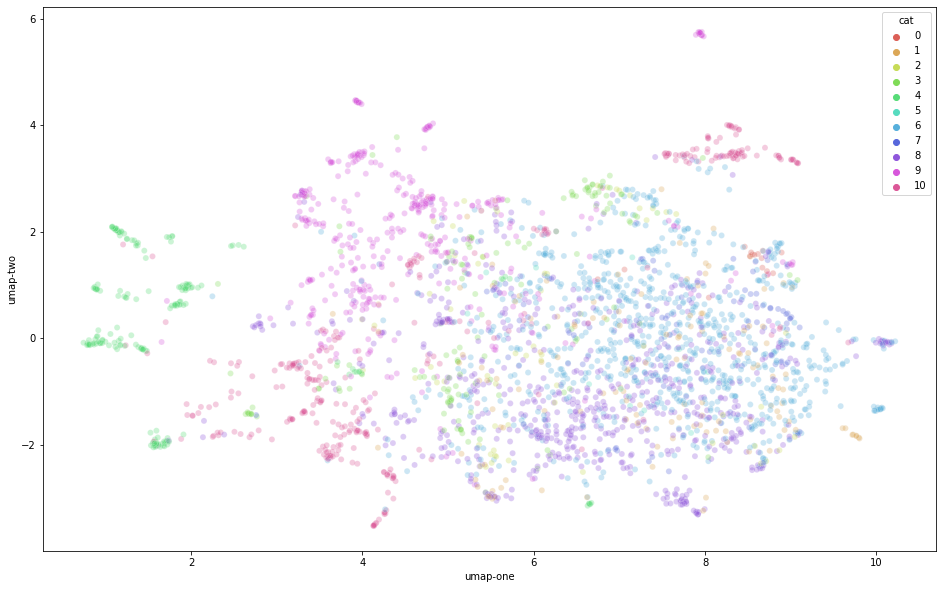

In [24]:
# 2d visualisation using UMAP
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="umap-one", y="umap-two",
    hue="cat",
    palette=sns.color_palette("hls", 11),
    data=df_vis,
    legend="full",
    alpha=0.3
)

# centre of clusters

In [ ]:
df_vis.columns

In [ ]:
# fine the centre point of each category cluster
centroid=[[] for _ in range(11)]
for i in range(11):
    x = df_vis.loc[df_vis['cat'] == i]['tsne-2d-one'].sum()/len(df_vis.loc[df_vis['cat'] == i])
    y = df_vis.loc[df_vis['cat'] == i]['tsne-2d-two'].sum()/len(df_vis.loc[df_vis['cat'] == i])
    centroid[i].append(x)
    centroid[i].append(y)
df_cent = pd.DataFrame(centroid)
df_cent['cat_lab'] = [i for i in range(11)]

In [ ]:
# plot with centre of each cluster

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cat",
    palette=sns.color_palette("hls", 11),
    data=df_vis,
    legend="full",
    alpha=0.3
)
sns.scatterplot(x = 0, y = 1,
                hue="cat_lab",
                palette=sns.color_palette("hls", 11),
                marker ='$\u25A0$',
                legend=False,
                 s= 100,
                data = df_cent)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cat",
    palette=sns.color_palette("hls", 1),
    data=df_vis.loc[df_vis['cat']==0],
    marker = 'X',
    s = 100,
    legend=False
)

In [ ]:
# centre only plot
sns.scatterplot(x = 0, y = 1,
                hue="cat_lab",
                palette=sns.color_palette("hls", 11),
                marker ='X',
                s= 100,
                data = df_cent)

In [ ]:
feat_cols = [str(i) for i in range(len(cont_proc_lst[0])) ]

In [ ]:
df_og = pd.DataFrame(cont_proc_lst,columns=feat_cols)
le = preprocessing.LabelEncoder()
df_og['cat'] = le.fit_transform(cat_lst)

In [ ]:
centroid_og=[[] for _ in range(11)]
for i in range(11):
    for j in range(len(feat_cols)): 
        x = df_og.loc[df_og['cat'] == i][str(j)].sum()/len(df_og.loc[df_og['cat'] == i])

        centroid_og[i].append(x)

In [ ]:
len(centroid_og)

In [ ]:
with open(validation_file, 'r', encoding = 'UTF-8') as fp:
    test_data = json.load(fp)

In [ ]:
label_lst_test= []
cat_lst_test = []
cont_lst_test = []
for i in range(len(test_data['input_data'])):
    label_lst_test.append(test_data['input_data'][i]['label'])
    cat_lst_test.append(test_data['input_data'][i]['category'])
    cont_lst_test.append(test_data['input_data'][i]['content']) 

In [ ]:
cont_proc_lst_test = []
for i in cont_lst_test:
    cont_proc_lst_test.append(se(i))

In [ ]:
le = preprocessing.LabelEncoder()
y_test = le.fit_transform(cat_lst_test)

In [ ]:
ypred = []
for cord in cont_proc_lst_test:
    dis_save = []
    for i in centroid_og:
        ed = np.linalg.norm(np.array(i)-np.array(cord))
        dis_save.append(ed)
    smallest = sorted(dis_save)[0]
    ypred.append(dis_save.index(smallest))

In [ ]:
# show label values
keys = le.classes_
values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
dictionary

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix: ')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report: ')
print (result1)
result2 = accuracy_score(y_test,ypred)
print(f'Accuracy: {result2}')